¡Hola, Deisy!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Deisy! Has hecho un excelente trabajo con el proyecto, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Muchas gracias por la minucionsa revisión, implementé todas las observaciones sugeridas y la corrección solicitada, espero haberlo hecho de manera correcta.
Quedo atenta a su retroalimentación, Mil gracias.
</div>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 2</b> <a class="tocSkip"></a>

Hola Deisy! Has hecho un excelente trabajo con los ajustes. Redondeste las variables antes de hacer el calculo del ingreso mensual por usuario y desarrollaste d emanera perfecta la prueba de levene para mostrar el supuesto de varianzas iguales. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

PROPÓSITO DEL PROYECTO:

Identificar cuál de las tarifas genera más ingresos a Megaline para la toma de decisiones.

ACCIONES A REALIZAR:

- Verificar las tablas existentes.
- Realizar la depuracón y limpieza de datos requerida.
- Procesar la información para obtener los datos requeridos.
- Realizar gráficos y análisis para presentar la información obtenida.

## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
from scipy.stats import levene
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Gracias. Se importó la librería math de acuerdo a la recomendación, sin embargo al usar el método math.ceil() para tratar de redondear los valores de la columna 'mb_used' al entero superior, Python lanza un TypeError. Revisando la documentación de Python, observo que este método está diseñado para trabajar con números individuales (tipo int o float), no con estructuras como una columna de pandas (tipo Series). No encontré ningún otro método de math para realizar este ajuste de datos. 
</div>

<div class="alert alert-block alert-info">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Hola, Deisy! Es correcot lo que mencionas y buscaste, en este sentido para poder hacer uso de math debemos de hacer sobre iteraciones de cada elemento de la base de datos de la columna que queremos redondear

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

Primero se debe conocer muy bien lo que representa cada dato en las tablas suministradas:

DICCIONARIO DE DATOS:

TABLA USERS (datos sobre los usuarios):
- user_id: identificador único del usuario.
- first_name: nombre del usuario.
- last_name: apellido del usuario.
- age: edad del usuario (en años).
- reg_date: fecha de suscripción (dd, mm, aa).
- churn_date: fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, el servicio se estaba usando cuando se extrajo la información).
- city: ciudad de residencia del usuario.
- plan: nombre de la tarifa.

TABLA CALLS (datos sobre las llamadas):
- id: identificador único de la llamada.
- call_date: fecha de la llamada.
- duration: duración de la llamada (en minutos).
- user_id: identificador del usuario que realiza la llamada.

TABLA MESSAGES (datos sobre los SMS):
- id: identificador único del SMS.
- message_date: fecha del SMS.
- user_id: identificador del usuario que manda el SMS.

TABLA INTERNET (datos sobre las sesiones web):
- id: identificador único de la sesión.
- mb_used: el volumen de datos gastados durante la sesión (en megabytes).
- session_date: fecha de la sesión web.
- user_id: identificador del usuario.

TABLA PLANS (datos sobre las tarifas):
- plan_name: nombre de la tarifa.
- usd_monthly_fee: pago mensual en dólares estadounidenses.
- minutes_included: minutos incluidos al mes.
- messages_included: SMS incluidos al mes.
- mb_per_month_included: datos incluidos al mes (en megabytes).
- usd_per_minute: precio por minuto tras exceder los límites del paquete.
- usd_per_message: precio por SMS tras exceder los límites del paquete.
- usd_per_gb: precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes).



A continuación se realiza la exploración de cada una de las 5 tablas para tener una comprensión inicial de los datos, se realizan las correcciones requeridas para el análisis en cada tabla:

## Tarifas / tabla plans

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Corregir datos

In [5]:
# Renombra la columna 'usd_monthly_pay' como 'usd_monthly_free'
plans.rename(columns={'usd_monthly_pay': 'usd_monthly_free'}, inplace=True)
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_free,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Enriquecer los datos

In [6]:
# Renombra la columna 'plan_name' como 'plan' con el fin de unirla con otra tablas más adelante.
plans.rename(columns={'plan_name': 'plan'}, inplace=True)
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_free,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Usuarios/as / tabla users

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
users.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
81,1081,Grayce,Sears,44,"Dallas-Fort Worth-Arlington, TX MSA",2018-04-27,surf,NaN


### Corregir los datos

In [9]:
# Cambia el tipo de datos de las columnas 'eg_date' y 'churn_date' a datetime
users['reg_date']=pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date']=pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()
users.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
341,1341,Kaila,Andrews,28,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-17,surf,NaT



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Gracias. Se agregó el argumento -format='%Y-%m-%d'- a la función to_datetime(), en las columnas de las cuatro tablas que usan ese tipo de datos: users['reg_date'], users['churn_date'], calls['call_date'], messages['message_date'] y internet['session_date'].
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!

## Llamadas / tabla calls

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
calls.sample()

,id,user_id,call_date,duration
18275,1071_19,1071,2018-11-13,13.0


### Corregir los datos

In [12]:
# Cambia el tipo de datos de las columnas 'call_date' a datetime
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

In [13]:
calls['month'] = calls['call_date'].dt.month
calls.info()
calls.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


,id,user_id,call_date,duration,month
35169,1132_565,1132,2018-05-20,9.76,5


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Gracias por la observación, a continuación:
    
- Observamos que el porcentaje de llamadas con una duración de 0, es del 19% con respecto al total de llamadas. Es demasiado alto. Puede deberse a errores en las llamada o posiblemente llamadas que no son respondidas.
    
- Se  lleva a cabo la modificación de la tabla 'calls', seleccionando mediante un filtro sólo las filas que tienen en la columna 'duration' un valor diferente de 0.
    
- Debido a este cambio, hubo la necesidad de revisar y ajustar los análisis que utilizan este dato a lo largo del proyecto, ya que en algunos casos la información se alteró.
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!

In [14]:
# Determinar la cantidad de llamadas con una ducación = 0 por usuario.
calls_0 = calls[calls['duration']==0]

calls_count = calls['id'].count()
calls_count_0 = calls_0['id'].count()

print('Total de llamadas:', calls_count)
print('Total de llamadas con duración de 0:', calls_count_0)
print('Total de llamadas con duración diferente de 0:', calls_count-calls_count_0)
print('Porcentaje de llamadas con duración de 0:', calls_count_0/calls_count)

Total de llamadas: 137735
Total de llamadas con duración de 0: 26834
Total de llamadas con duración diferente de 0: 110901
Porcentaje de llamadas con duración de 0: 0.1948233927469416


In [15]:
# Filtro la tabla calls, sólo con las filas que tienen en la columna 'duration' un valor diferente a 0:
calls = calls[calls['duration'] != 0]
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
 4   month      110901 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.1+ MB


## Mensajes / tabla messages

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Imprime una muestra de datos para los mensajes
messages.sample()

,id,user_id,message_date
48644,1326_181,1326,2018-09-22


### Corregir los datos

In [18]:
#Se modifica el tipo de datos de la columna 'message_date' a datetime64.
messages['message_date']=pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

In [19]:
#Se crea la columna 'month' para poder calcular cantidad de mensajes por mes.
messages['month'] = messages['message_date'].dt.month
messages.info()
messages.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


,id,user_id,message_date,month
9771,1075_26,1075,2018-10-06,10


## Internet / tabla internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample()

,id,user_id,session_date,mb_used
86638,1402_167,1402,2018-09-14,428.39


### Corregir los datos

In [22]:
#Se modifica el tipo de datos de la columna 'session_date' a datetime64.
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

In [23]:
#Se crea la columna 'month' para poder calcular el volumen del tráfico de Internet usado por cada usuario al mes(más adelante).
internet['month'] = internet['session_date'].dt.month
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Gracias por el comentario; debido a que aún no se han totalizado los mb_used consumidos por usuario, en este momento no se debe hacer la conversión a GB, esto concuerda con su recomendación: cuando se realice la agrupación, se realizará la conversión y redondeo de los datos. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!

In [24]:
#Se crea la columna 'month' para poder calcular el volumen del tráfico de Internet usado por cada usuario al mes(más adelante).
#internet['mb_used'] = (internet['mb_used']/1024)
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Estudiar las condiciones de las tarifas

Condiciones de cada tarifa:

In [25]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print("\033[1mTARIFA SURF:\033[0m \nPago mensual: $20\nMinutos mensuales: 500\nSMS mensuales: 50\nGB de datos mensuales: 15\nPago adicional al exceder los límites del paquete:\n1 minuto: 3 centavos.\n1 SMS: 3 centavos.\n1 GB de datos: $10.\n\n\033[1mTARIFA ULTIMATE:\033[0m \nPago mensual: $70\nMinutos mensuales: 3000\nSMS mensuales: 1000\nGB de datos mensuales: 30\nPago adicional al exceder los límites del paquete:\n1 minuto: 1 centavo.\n1 SMS: 1 centavo.\n1 GB de datos: $7.")

TARIFA SURF: 
Pago mensual: $20
Minutos mensuales: 500
SMS mensuales: 50
GB de datos mensuales: 15
Pago adicional al exceder los límites del paquete:
1 minuto: 3 centavos.
1 SMS: 3 centavos.
1 GB de datos: $10.

TARIFA ULTIMATE: 
Pago mensual: $70
Minutos mensuales: 3000
SMS mensuales: 1000
GB de datos mensuales: 30
Pago adicional al exceder los límites del paquete:
1 minuto: 1 centavo.
1 SMS: 1 centavo.
1 GB de datos: $7.


## Agregar datos por usuario

In [26]:
# 1. Número de usuarios por plan:
users_ultimate = users[users['plan']=='ultimate'][['user_id']].count().reset_index()
users_ultimate.rename(columns={'index': 'plan_ultimate'}, inplace=True)
print(users_ultimate,'\n')

users_surf = users[users['plan']=='surf'][['user_id']].count().reset_index()
users_surf.rename(columns={'index': 'plan_surf'}, inplace=True)
print(users_surf)

  plan_ultimate    0
0       user_id  161 

  plan_surf    0
0   user_id  339


In [27]:
# 2. Cálculo del número de llamadas hechas por cada usuario al mes.
calls_made = calls.groupby(['user_id','month'])['id'].count().reset_index()
calls_made.rename(columns={'id': 'num_calls'}, inplace=True)
print(calls_made)

      user_id  month  num_calls
0        1000     12         16
1        1001      8         22
2        1001      9         38
3        1001     10         47
4        1001     11         49
...       ...    ...        ...
2251     1498     12         32
2252     1499      9         35
2253     1499     10         41
2254     1499     11         39
2255     1499     12         56

[2256 rows x 3 columns]


In [28]:
# 3. Cálculo de la cantidad de minutos usados por cada usuario al mes.
calls_duration = calls.groupby(['user_id','month'])['duration'].sum().reset_index()
print(calls_duration)

      user_id  month  duration
0        1000     12    116.83
1        1001      8    171.14
2        1001      9    297.69
3        1001     10    374.11
4        1001     11    404.59
...       ...    ...       ...
2251     1498     12    324.77
2252     1499      9    330.37
2253     1499     10    363.28
2254     1499     11    288.56
2255     1499     12    468.10

[2256 rows x 3 columns]


In [29]:
# 4. Cálculo del número de llamadas hechas por cada usuario al mes (usando pivot de acuerdo a recomendación).
pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                            values=['duration'],
                            aggfunc=['sum','count']).reset_index()
print(pivot_calls)

     user_id month      sum    count
                   duration duration
0       1000    12   116.83       16
1       1001     8   171.14       22
2       1001     9   297.69       38
3       1001    10   374.11       47
4       1001    11   404.59       49
...      ...   ...      ...      ...
2251    1498    12   324.77       32
2252    1499     9   330.37       35
2253    1499    10   363.28       41
2254    1499    11   288.56       39
2255    1499    12   468.10       56

[2256 rows x 4 columns]



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Muchas gracias por su recomendación, se realiza la agrupación de esta manera, se considera buena opción y se tendrá en cuenta para próximas ocasiones.
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! En futuros proyectos puedes seguir explorando esta herramienta
    

In [30]:
# 5. Cálculo del número de mensajes enviados por cada usuario al mes.
msm_made = messages.groupby(['user_id','month'])['id'].count().reset_index()
msm_made.rename(columns={'id': 'num_sms'}, inplace=True)
print(msm_made)

      user_id  month  num_sms
0        1000     12       11
1        1001      8       30
2        1001      9       44
3        1001     10       53
4        1001     11       36
...       ...    ...      ...
1801     1496      9       21
1802     1496     10       18
1803     1496     11       13
1804     1496     12       11
1805     1497     12       50

[1806 rows x 3 columns]


In [31]:
# 6. Cálculo del volumen del tráfico de Internet usado por cada usuario al mes.
month_use = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
month_use['gb_used'] = np.ceil(month_use['mb_used']/1024)
print(month_use)

      user_id  month   mb_used  gb_used
0        1000     12   1901.47      2.0
1        1001      8   6919.15      7.0
2        1001      9  13314.82     14.0
3        1001     10  22330.49     22.0
4        1001     11  18504.30     19.0
...       ...    ...       ...      ...
2272     1498     12  23137.69     23.0
2273     1499      9  12984.76     13.0
2274     1499     10  19492.43     20.0
2275     1499     11  16813.83     17.0
2276     1499     12  22059.21     22.0

[2277 rows x 4 columns]


In [32]:
# 7. Fusión de los datos de llamadas, minutos, mensajes e Internet con base en user_id y month.
call_dur = calls_made.merge(calls_duration, on=['user_id', 'month'], how='outer')
call_dur_sms = call_dur.merge(msm_made, on=['user_id', 'month'], how='outer')
call_dur_sms_net = call_dur_sms.merge(month_use, on=['user_id', 'month'], how='outer')
call_dur_sms_net.info()
call_dur_sms_net.sample()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2293 non-null   int64  
 1   month      2293 non-null   int64  
 2   num_calls  2256 non-null   float64
 3   duration   2256 non-null   float64
 4   num_sms    1806 non-null   float64
 5   mb_used    2277 non-null   float64
 6   gb_used    2277 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 143.3 KB


,user_id,month,num_calls,duration,num_sms,mb_used,gb_used
2204,1490,10,34.0,238.28,NaN,36997.03,37.0


In [33]:
# 8. Creación de tabla general que fusiona la información obtenida anteriormente, ciudad y la información de la tabla tarifa.
plan_user = plans.merge(users, on='plan',how='outer')[['user_id','plan','city','messages_included','mb_per_month_included','minutes_included','usd_monthly_free','usd_per_gb','usd_per_message','usd_per_minute']]
general_table = call_dur_sms_net.merge(plan_user, on='user_id',how='outer')
general_table.info()
general_table.sample()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2303 non-null   int64  
 1   month                  2293 non-null   float64
 2   num_calls              2256 non-null   float64
 3   duration               2256 non-null   float64
 4   num_sms                1806 non-null   float64
 5   mb_used                2277 non-null   float64
 6   gb_used                2277 non-null   float64
 7   plan                   2303 non-null   object 
 8   city                   2303 non-null   object 
 9   messages_included      2303 non-null   int64  
 10  mb_per_month_included  2303 non-null   int64  
 11  minutes_included       2303 non-null   int64  
 12  usd_monthly_free       2303 non-null   int64  
 13  usd_per_gb             2303 non-null   int64  
 14  usd_per_message        2303 non-null   float64
 15  usd_

,user_id,month,num_calls,duration,num_sms,mb_used,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_free,usd_per_gb,usd_per_message,usd_per_minute
721,1155,9.0,29.0,201.3,47.0,25109.6,25.0,ultimate,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",1000,30720,3000,70,7,0.01,0.01


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [34]:
# 9. Cálculo del ingreso mensual para cada usuario:

# Creación de tres columnas en la tabla general_table (llamadas, mensajes e internet) con el cálculo de cobro adicional por servicio y usuario:
general_table['ing_calls'] = (general_table['duration'] - general_table['minutes_included']).clip(lower=0) * general_table['usd_per_minute']
general_table['ing_sms'] = (general_table['num_sms'] - general_table['messages_included']).clip(lower=0) * general_table['usd_per_message']
general_table['ing_net'] = ((general_table['mb_used'] - general_table['mb_per_month_included']) / 1024).clip(lower=0) * general_table['usd_per_gb']

# Crea la columna con el cálculo del ingreso mensual: Suma la tarifa fija y los cobros adicionales por cada servicio:
general_table['ing_month'] = general_table['usd_monthly_free'] + general_table['ing_calls'] + general_table['ing_sms'] + general_table['ing_net']

#Imprime ingresos por usuario, mes y plan:
general_table[['user_id', 'month', 'plan', 'ing_month']].round(2).sample()

,user_id,month,plan,ing_month
1143,1249,8.0,ultimate,70.0


In [35]:
# 10. Imprime la tabla general con las nuevas columnas (ingresos por servicios y totales):
general_table.info()
general_table.sample().round(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2303 non-null   int64  
 1   month                  2293 non-null   float64
 2   num_calls              2256 non-null   float64
 3   duration               2256 non-null   float64
 4   num_sms                1806 non-null   float64
 5   mb_used                2277 non-null   float64
 6   gb_used                2277 non-null   float64
 7   plan                   2303 non-null   object 
 8   city                   2303 non-null   object 
 9   messages_included      2303 non-null   int64  
 10  mb_per_month_included  2303 non-null   int64  
 11  minutes_included       2303 non-null   int64  
 12  usd_monthly_free       2303 non-null   int64  
 13  usd_per_gb             2303 non-null   int64  
 14  usd_per_message        2303 non-null   float64
 15  usd_

,user_id,month,num_calls,duration,num_sms,mb_used,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_free,usd_per_gb,usd_per_message,usd_per_minute,ing_calls,ing_sms,ing_net,ing_month
2153,1474,11.0,34.0,242.96,30.0,18222.36,18.0,surf,"Bakersfield, CA MSA",50,15360,500,20,10,0.03,0.03,0.0,0.0,27.95,47.95


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Muchas gracias por su recomendación, en la agrupación para calcular el volumen del tráfico de Internet usado por cada usuario al mes (numeral 6 del presente punto: 1.10), realicé la conversión de la columna 'mb_used' a gigabites y se redondeó el número al entero superior. Para redondear los valores dee esa columna, utilicé el método np.ceil().
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!

## Estudia el comportamiento de usuario

### Llamadas

In [36]:
# Comparación de la duración promedio de llamadas por plan y por mes.
prom_duration = general_table.groupby(['month','plan'])['duration'].mean().reset_index()
prom_duration.sample(5)

,month,plan,duration
23,12.0,ultimate,438.824832
22,12.0,surf,457.547074
17,9.0,ultimate,413.287326
20,11.0,surf,408.255415
6,4.0,surf,332.380000


In [37]:
# Con pivot organizo tabla para tener las columnas 'surf' y 'ultimate' y graficar fácilmente:
plans_pivot = prom_duration.pivot(index='month', columns='plan', values='duration')

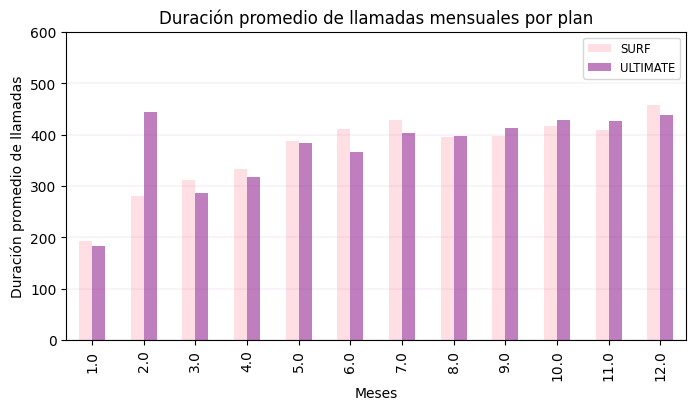

In [38]:
# Gráfico de barras para visualizar la duración promedio de llamadas por plan y por mes:
colors = ['pink', 'purple']
plans_pivot.plot(kind='bar',
              title='Duración promedio de llamadas mensuales por plan',
              xlabel='Meses',
              ylabel='Duración promedio de llamadas',
              figsize=[8,4],
              ylim=[0,600],
              alpha=0.5,
              color=colors)
plt.grid(axis='y', color='purple', linewidth=0.06)
plt.legend(['SURF','ULTIMATE'], fontsize='small')
plt.show()

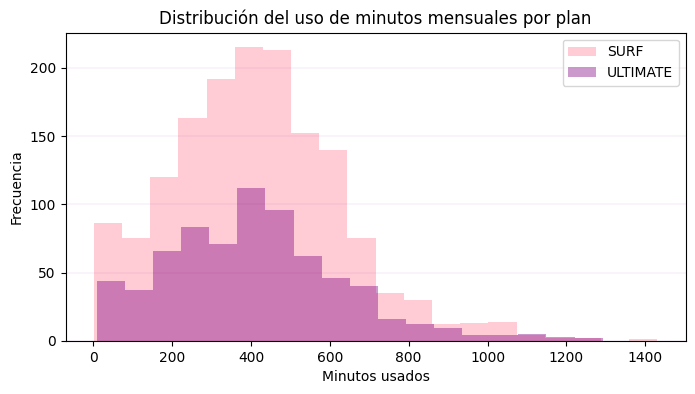

In [39]:
# Histograma de la comparación del número de minutos mensuales que necesitan los usuarios de cada plan:

# Filtra los datos de cada plan:
surf_users = general_table[general_table['plan'] == 'surf']
ultimate_users = general_table[general_table['plan'] == 'ultimate']

# Crea gráfico:
plt.figure(figsize=(8, 4))

# Crea histograma para el plan Surf:
plt.hist(surf_users['duration'], bins=20, alpha=0.8, label='SURF', color='pink')

# Crea histograma para el plan ultimate:
plt.hist(ultimate_users['duration'], bins=18, alpha=0.4, label='ULTIMATE', color='purple')

# Personalización del gráfico:
plt.title('Distribución del uso de minutos mensuales por plan')
plt.xlabel('Minutos usados')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', color='purple', linewidth=0.06)
plt.show()

In [40]:
# Cálculo de la media y la varianza de la duración mensual de llamadas:
mean_var = general_table.groupby(['month','plan'])['duration'].agg(['mean', 'var']).reset_index()

# Renombrar columnas para claridad
mean_var.rename(columns={'mean': 'media_duracion', 'var': 'varianza_duracion'}, inplace=True)

# Pivote para crear las dos columnas para surf y ultimate:
mean_surf_ultimate = mean_var.pivot(index='month', columns='plan', values='media_duracion')
var_surf_ultimate = mean_var.pivot(index='month', columns='plan', values='varianza_duracion')

print('PROMEDIO DURACIÓN DE LLAMADAS:\n', mean_surf_ultimate,'\n')
print('VARIANZA DURACIÓN DE LLAMADAS:\n', var_surf_ultimate,'\n')

PROMEDIO DURACIÓN DE LLAMADAS:
 plan         surf    ultimate
month                        
1.0    192.840000  183.162500
2.0    280.851111  443.171667
3.0    310.970000  285.701667
4.0    332.380000  316.508095
5.0    387.108000  383.664828
6.0    411.450625  365.358222
7.0    428.060917  403.767288
8.0    394.474717  397.274789
9.0    397.133298  413.287326
10.0   416.229827  429.217238
11.0   408.255415  427.205200
12.0   457.547074  438.824832 

VARIANZA DURACIÓN DE LLAMADAS:
 plan           surf      ultimate
month                            
1.0    14795.440200  14991.369958
2.0    46959.219961  48579.581537
3.0    31821.317991  54273.917252
4.0    45615.666796  31057.727496
5.0    50778.127459  39290.610940
6.0    39424.054023  33837.770156
7.0    53364.540232  64844.426958
8.0    46639.240873  47680.189425
9.0    39785.302974  50994.505514
10.0   43545.434710  47081.623851
11.0   43560.874928  52243.135715
12.0   53646.781898  53967.731609 



In [41]:
# Agrupar por plan y calcular la duración de llamadas, promedio y mediana
duracion_por_plan = general_table.groupby('plan')['duration'].agg(['sum', 'mean', 'median']).reset_index()

# Renombrar columnas para claridad
duracion_por_plan.columns = ['plan', 'total_duración_llamadas', 'promedio_duración', 'mediana_duración']
print('TOTAL, PROMEDIO Y VARIANZA TOTAL DE LLAMADAS PLANES SURF Y ULTIMATE:\n', duracion_por_plan)

TOTAL, PROMEDIO Y VARIANZA TOTAL DE LLAMADAS PLANES SURF Y ULTIMATE:
        plan  total_duración_llamadas  promedio_duración  mediana_duración
0      surf                636691.24         412.364793           405.925
1  ultimate                292459.02         410.757051           400.075


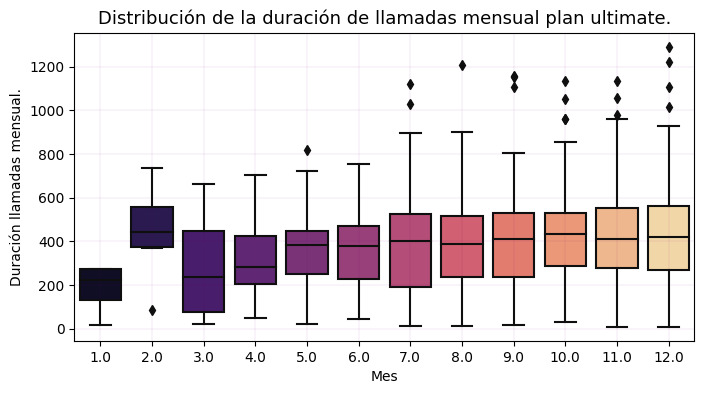

In [42]:
# Diagrama de caja para visualizar la distribución de la duración mensual de llamadas del plan ultimate:

caja_ult = general_table[general_table['plan']=='ultimate']
plt.figure(figsize=(8, 4))
sns.boxplot(x='month', y='duration', data=caja_ult, palette='magma')
plt.title('Distribución de la duración de llamadas mensual plan ultimate.', fontsize=13)
plt.xlabel('Mes', fontsize=10)
plt.ylabel('Duración llamadas mensual.', fontsize=10)
plt.grid(color='purple', linewidth=0.06)
plt.show()

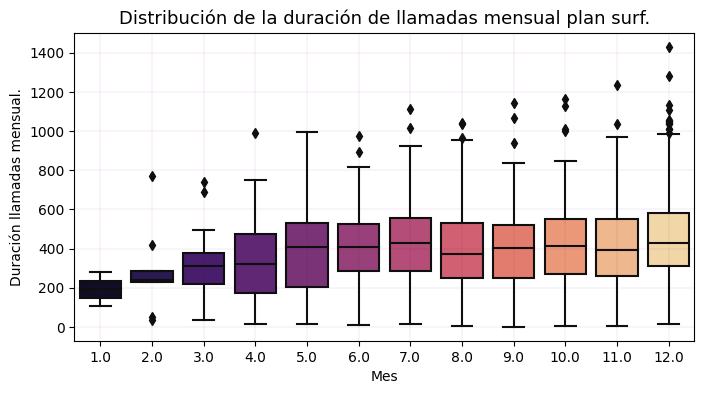

In [43]:
# Diagrama de caja para visualizar la distribución de la duración mensual de llamadas del plan surf:
caja_sur = general_table[general_table['plan']=='surf']
plt.figure(figsize=(8, 4))
sns.boxplot(x='month', y='duration', data=caja_sur, palette='magma')
plt.title('Distribución de la duración de llamadas mensual plan surf.', fontsize=13)
plt.xlabel('Mes', fontsize=10)
plt.ylabel('Duración llamadas mensual.', fontsize=10)
plt.grid(color='purple', linewidth=0.06)
plt.show()

### Mensajes

In [44]:
# Agrupación por plan y promedio mensual del número de mensajes que envian los usuarios de cada plan.
messages_por_plan = general_table.groupby(['plan', 'month'])['num_sms'].mean().reset_index()
messages_por_plan.head().round(2)

,plan,month,num_sms
0,surf,1.0,21.00
1,surf,2.0,21.60
2,surf,3.0,21.94
3,surf,4.0,24.17
4,surf,5.0,33.02


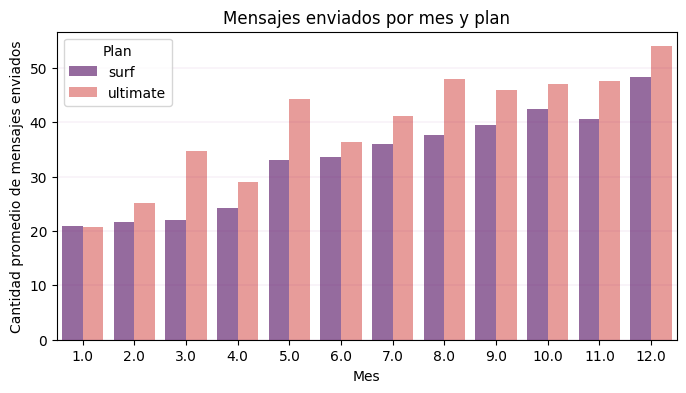

In [45]:
# Gráfico de barras del número de mensajes que tienden a enviar cada mes los usuarios de cada plan.
plt.figure(figsize=(8, 4))
colors = ['red', 'purple']
sns.barplot(data=messages_por_plan, x='month', y='num_sms', hue='plan', palette='magma', alpha=0.7)
plt.title('Mensajes enviados por mes y plan')
plt.xlabel('Mes')
plt.ylabel('Cantidad promedio de mensajes enviados')

plt.grid(axis='y', color='purple', linewidth=0.06)
plt.legend(title='Plan')
plt.show()

### Internet

In [46]:
# Calcula el promedio mensual del tráfico de internet por plan
internet_avg_monthly = general_table.groupby(['plan', 'month'])['mb_used'].mean().reset_index()
internet_avg_monthly.head().round(2)

,plan,month,mb_used
0,surf,1.0,4874.86
1,surf,2.0,12178.84
2,surf,3.0,13345.44
3,surf,4.0,12228.78
4,surf,5.0,14119.73


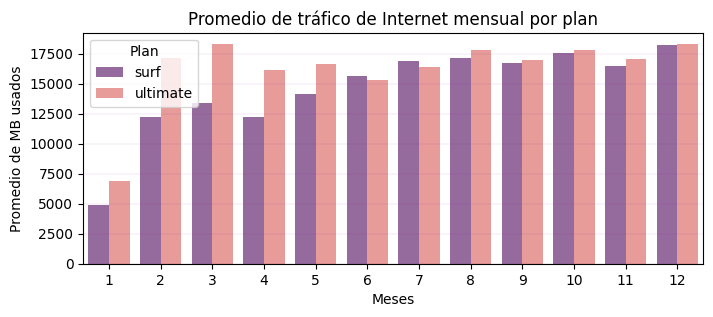

In [47]:
# Graficar el tráfico promedio mensual de internet por plan
plt.figure(figsize=(8, 3))
sns.barplot(data=internet_avg_monthly, x='month', y='mb_used', hue='plan', palette='magma', alpha=0.7)
plt.title('Promedio de tráfico de Internet mensual por plan', fontsize=12)
plt.xlabel('Meses', fontsize=10)
plt.ylabel('Promedio de MB usados', fontsize=10)
plt.legend(title='Plan')
plt.xticks(ticks=range(12), labels=range(1, 13))
plt.grid(axis='y', color='purple', linewidth=0.06)
plt.show()

ANÁLISIS PROMEDIO DE TRÁFICO DE INTERNET MENSUAL POR PLAN:

Ambos planes muestran un aumento constante en el consumo promedio de datos de Internet a lo largo del año.
Esto puede indicar que en general, los usuarios dependen más de Internet con el paso del tiempo, tal vez por un incremento en la disponibilidad de servicios digitales o un cambio en los hábitos de consumo.

Los usuarios del plan Ultimate tienden a consumir más tráfico de Internet en comparación con los del plan Surf, especialmente en los primeros meses (enero a mayo).
A partir de la mitad del año la brecha se reduce, mostrando un consumo más equilibrado entre ambos planes.

La diferencia en los meses iniciales sugiere que los usuarios del plan Ultimate pueden ser más intensivos en su uso de datos.

In [48]:
# Agrupar por plan y calcular el tráfico total, promedio y mediana
trafico_por_plan = general_table.groupby('plan')['mb_used'].agg(['sum', 'mean', 'median']).reset_index()

# Renombrar columnas para claridad
trafico_por_plan.columns = ['plan', 'total_mb_usados', 'promedio_mb_usados', 'mediana_mb_usados']
trafico_por_plan.head()

,plan,total_mb_usados,promedio_mb_usados,mediana_mb_usados
0,surf,26046179.93,16717.702137,16923.83
1,ultimate,12394583.78,17238.642253,16863.45


## Ingreso

In [49]:
#ingresos mensuales para cada grupo:

#Ingresos por usuario y mes, del plan ultimate:
ing_mes_ultimate = general_table[general_table['plan']=='ultimate'][['plan','user_id', 'month', 'ing_month']].round(2)
ing_mes_ultimate.head()

,plan,user_id,month,ing_month
0,ultimate,1000,12.0,70.00
19,ultimate,1006,11.0,70.00
20,ultimate,1006,12.0,79.56
26,ultimate,1008,10.0,70.00
27,ultimate,1008,11.0,70.00


In [50]:
#Ingresos por usuario y mes, del plan surf:
ing_mes_surf= general_table[general_table['plan']=='surf'][['plan','user_id', 'month', 'ing_month']].round(2)
ing_mes_surf.head()

,plan,user_id,month,ing_month
1,surf,1001,8.0,20.00
2,surf,1001,9.0,20.00
3,surf,1001,10.0,88.16
4,surf,1001,11.0,50.71
5,surf,1001,12.0,59.15


In [51]:
#Obtiene información de ingresos por usuario, mes y plan:
ing_mes = general_table[['user_id', 'month', 'plan', 'ing_month']].round(2)
ing_mes.head()

,user_id,month,plan,ing_month
0,1000,12.0,ultimate,70.00
1,1001,8.0,surf,20.00
2,1001,9.0,surf,20.00
3,1001,10.0,surf,88.16
4,1001,11.0,surf,50.71


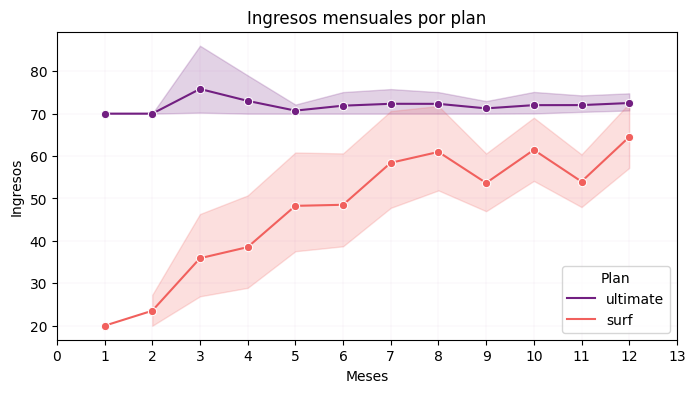

In [52]:
# Grafica información de ingresos por usuario, mes y plan:
plt.figure(figsize=(8, 4))
sns.lineplot(data=ing_mes, x='month', y='ing_month', hue='plan', palette='magma', marker='o')
plt.title('Ingresos mensuales por plan', fontsize=12)
plt.xlabel('Meses', fontsize=10)
plt.ylabel('Ingresos', fontsize=10)
plt.legend(title='Plan')
plt.grid(color='purple', linewidth=0.03)
plt.xticks(ticks=range(14), labels=range(0, 14))
plt.show()

In [53]:
# Agrupar por plan y calcular los ingresos total, promedio y mediana
ing_tot_mea_med = general_table.groupby('plan')['ing_month'].agg(['sum', 'mean', 'median']).reset_index()

# Renombrar columnas para claridad
ing_tot_mea_med.columns = ['plan', 'total_ingresos', 'promedio_ingresos', 'mediana_inrgesos']
print(ing_tot_mea_med)

       plan  total_ingresos  promedio_ingresos  mediana_inrgesos
0      surf    67115.420108          56.877475         36.841452
1  ultimate    41654.436182          72.066499         70.000000


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

### Hipótesis 1:
- H0: Los ingresos promedio de Ultimate y Surf son iguales.
- Ha: Los ingresos promedio de Ultimate y Surf son diferentes.
- Nivel de significación estadística: 5%

In [54]:
#Filtro para crear dos tablas con ingresos del plan ultimate y plan surf
ingresos_ultimate = general_table[general_table['plan']=='ultimate']['ing_month'].round(2).dropna()
ingresos_surf = general_table[general_table['plan']=='surf']['ing_month'].round(2).dropna()

# nivel crítico de significación estadística:
alpha = 0.05

# prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales:
results = st.ttest_ind(ingresos_ultimate, ingresos_surf, equal_var=False)

# valor p obtenido:
print('valor p:', results.pvalue)

# compara los valores p obtenidos con el nivel de significación estadística:
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: los ingresos promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: los ingresos promedio no son significativamente diferentes.")

valor p: 1.9208880718231047e-21
Rechazamos la hipótesis nula: los ingresos promedio son diferentes.


### Hipótesis 2
- H0: El ingreso promedio de los usuarios de NY-NJ es igual al de otras regiones.
- Ha: El ingreso promedio de los usuarios de NY-NJ es diferente al de otras regiones.
- Nivel de significación estadística: 5%

In [55]:
# Filtrar ingresos para NY-NJ y otras regiones
ny_nj_income = general_table[general_table['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]['ing_month'].dropna()
other_regions_income = general_table[~general_table['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]['ing_month'].dropna()

# nivel crítico de significación estadística:
alpha = 0.05

# prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales:
results = st.ttest_ind(ny_nj_income, other_regions_income, equal_var=False)

# valor p obtenido:
print('valor p:', results.pvalue)

# compara los valores p obtenidos con el nivel de significación estadística:
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: los ingresos promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: los ingresos promedio no son significativamente diferentes.")

valor p: 0.002083474160461979
Rechazamos la hipótesis nula: los ingresos promedio son diferentes.


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo desarrollando las pruebas de hipótesis. Solamente te recomendaría que para robustecer el análisis desarrolles una prueba de levene que te ayude a probar el supuesto de las varianzas iguales.

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Muchas gracias por su recomendación, a continuación desarrollo una prueba de levene para las dos hipótesis planteadas.
</div>

In [56]:
# Hipótesis 1:
# H0: Los ingresos promedio de Ultimate y Surf son iguales.
# Ha: Los ingresos promedio de Ultimate y Surf son diferentes.
# Nivel de significación estadística: 5%

# Realizar la prueba de Levene
stat, p_value = levene(ingresos_ultimate, ingresos_surf)

print(f"Statistic: {stat:.4f}, P-value: {p_value:.4f}")

alpha = 0.05

if p_value < alpha:
    print('Rechazamos la hipótesis nula: las varianzas no son iguales, hay heterogeneidad de varianzas.')
else:
    print('No podemos rechazar la hipótesis nula: las varianzas son iguales, hay homogeneidad de varianzas.')

Statistic: 301.1361, P-value: 0.0000
Rechazamos la hipótesis nula: las varianzas no son iguales, hay heterogeneidad de varianzas.


In [57]:
# Hipótesis 2:
# H0: El ingreso promedio de los usuarios de NY-NJ es igual al de otras regiones.
# Ha: El ingreso promedio de los usuarios de NY-NJ es diferente al de otras regiones.
# Nivel de significación estadística: 5%

# Realizar la prueba de Levene
stat, p_value = levene(ny_nj_income, other_regions_income)

print(f"Statistic: {stat:.4f}, P-value: {p_value:.4f}")

alpha = 0.05

if p_value < alpha:
    print('Rechazamos la hipótesis nula: las varianzas no son iguales, hay heterogeneidad de varianzas.')
else:
    print('No podemos rechazar la hipótesis nula: las varianzas son iguales, hay homogeneidad de varianzas.')

Statistic: 0.0001, P-value: 0.9903
No podemos rechazar la hipótesis nula: las varianzas son iguales, hay homogeneidad de varianzas.


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Deisy, gran trabajo con la prueba de levene para mostrar el espuesto de varianzas iguales1

## Conclusión general

LLAMADAS:

- El promedio y la mediana de duración indican que los usuarios de Surf y Ultimate tienen necesidades similares de minutos, lo que sugiere que la elección del plan no está motivada por la necesidad de tiempo de llamada.

- Si los minutos incluidos en cada plan (surf: 500, ultimate: 3000) son suficientes para cubrir el promedio de uso mensual (410 minutos), es probable que la mayoría de los usuarios no incurran en cargos adicionales por excedentes en llamadas.

- Ya que la mayoría de los usuarios pertenecen al plan Surf, se podrían desarrollar promociones relacionadas con minutos adicionales para generar ingresos extra.

- Optimizar Ultimate para clientes de alto consumo: Aunque Ultimate incluye muchos más minutos, el promedio de uso de los usuarios no justifica este diferencial. Podría ser útil revisar si otros beneficios del plan (datos o SMS) son los que realmente justifican su costo.

- Gráfico de barras: El plan Ultimate parece atraer a usuarios que realizan un mayor consumo mensual de minutos, especialmente en los primeros meses del año. En los últimos meses, las diferencias entre los planes son menos marcadas, posiblemente porque ambos tipos de usuarios aumentan su actividad. El crecimiento a lo largo del año, sugiere que los usuarios ajustan su comportamiento dependiendo del contexto del año, lo cual puede influir en la estrategia comercial y de publicidad.

- Histograma: Si el plan Ultimate incluye más minutos, podría atraer a usuarios de alto consumo, ya que su distribución abarca un rango mayor. Por otro lado, el plan Surf parece más adecuado para usuarios con necesidades moderadas de minutos. Sería importante ajustar la segmentación y la publicidad de los planes: destacar las ventajas de Ultimate para usuarios intensivos y de Surf para quienes buscan opciones más económicas con consumo medio. Ambas distribuciones se solapan mucho en el rango medio (aproximadamente entre 300 y 700 minutos), lo que indica que una gran parte de los usuarios tiene necesidades de minutos similares, independientemente del plan.

- Gráficos de caja: En el plan Surf, hay una mayor dispersión y más valores atípicos a lo largo del año en comparación con el plan Ultimate, esto podría indicar que el plan Surf tiene un grupo de usuarios más diverso en términos de comportamiento de uso. El gráfico sugiere que en el plan Surf, hay usuarios con necesidades de comunicación más extremas hacia finales de año.

MENSAJES:

- Los usuarios del plan ultimate tienden a enviar más mensajes, lo que lo hace más rentable en este aspecto.

- El comportamiento de los usuarios se alinea con patrones estacionales, siendo los meses finales más activos.

- La tendencia al alza en el envío de mensajes hacia finales del año podría estar relacionada con: Festividades: Mayor interacción social durante la temporada de fin de año. Incremento general en el uso: Más comunicación debido a cambios en las actividades laborales o personales. Los primeros meses, con menor número promedio de mensajes, podrían reflejar un menor interés o necesidad de comunicación durante ese período.

INTERNET:

- Ambos planes evidencian usuarios que aprovechan cada vez más los servicios de datos de Megaline. Esto indica la necesidad de mantener atractivos los planes y asegurar que los límites mensuales sean adecuados para satisfacer las demandas de los clientes. 

- El plan Ultimate parece ser más atractivo para usuarios con altos requerimientos de datos, pero el crecimiento sostenido del uso en el plan Surf destaca la importancia de monitorear su rentabilidad y competitividad.

- Dado que el tráfico total es más alto en Surf, este plan podría tener más usuarios. Podría ser porque es más económico o cubre las necesidades de la mayoría de los clientes.

- Aunque el uso promedio de Ultimate es ligeramente superior, no parece ser una gran ventaja. Esto indica que el plan no necesariamente atrae a usuarios con necesidades significativamente mayores de datos.

- Si Ultimate incluye más datos que Surf, este análisis podría indicar que la mayoría de sus usuarios no aprovechan el límite superior del plan. Esto puede ser una oportunidad para optimizar la oferta.

- Como Surf tiene más clientes, la compañía podría enfocarse en mantener o mejorar su estructura de precios para retenerlos.


INGRESOS:

Plan surf: 67115.420108 USD.
Plan ultimate: 41724.436182 USD.

- Se podrían enfocar en campañas publicitarias para destacar las ventajas del plan Ultimate y captar clientes dispuestos a pagar más. Analizar si es posible optimizar los precios o servicios ofrecidos en el plan Surf para incrementar los ingresos y la rentabilidad a largo plazo.

- Surf domina en volumen total: Este plan parece ser más popular debido a un costo mensual más bajo, pero muchos clientes podrían no estar utilizando servicios adicionales como datos, minutos o mensajes extra. Es un plan más accesible y genera ingresos a través de una base más amplia de usuarios.

- Aunque es menos popular, los clientes de Ultimate tienden a generar más ingresos mensuales (por cliente), debido a un precio base más alto, mayor consumo de datos, minutos o mensajes adicionales. Se podrían implementar estrategias de marketing para aumentar la cantidad de suscriptores.

- Surf tiene margen para incrementar ingresos si se incentiva a los clientes a consumir más servicios adicionales.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Deisy, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que redondeamos las variables antes de hacer el calculo de ingresos mensuales por usuario

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    

</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Muchas gracias por todas sus recomendaciones, me parecieron muy acertadas y aprendí más sobre preparación de datos y análisis. Voy a poner en práctica lo aprendido en este proyecto.
</div>